In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("/content/transformed_data.csv")
data2 = pd.read_csv("/content/raw_data.csv")
print(data)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


In [ ]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [ ]:
print(data2.head())

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

In [ ]:
data["COUNTRY"].value_counts()

,count
COUNTRY,
Afghanistan,294
Indonesia,294
Macedonia,294
Luxembourg,294
Lithuania,294
...,...
Tajikistan,172
Comoros,171
Lesotho,158


In [ ]:
data["COUNTRY"].value_counts().mode()

,count
0,294


In [ ]:
# Aggregating the data

code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)),
                               columns = ["Country Code", "Country", "HDI",
                                          "Total Cases", "Total Deaths",
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0      165875.0   
1          ALB      Albania  0.600765    1071951.0       31056.0   
2          DZA      Algeria  0.754000    4893999.0      206429.0   
3          AND      Andorra  0.659551     223576.0        9850.0   
4          AGO       Angola  0.418952     304005.0       11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


In [ ]:
# Sorting Data According to Total Cases

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


In [ ]:
# Top 10 Countries with Highest Covid Cases

data = data.head(10)
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.4

In [ ]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75,
                            11497.65, 7027.61, 9946.03,
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71,
                            10126.72, 6126.87, 8346.70,
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  GDP Before Covid  GDP During Covid  
200          3.350949   19.617637          65279.53          63543.58  
27           3.136028   19.174732           8897.49 

In [ ]:
figure = px.bar(data, y='Total Cases', x='Country',
            title="Countries with Highest Covid Cases")
figure.show()

In [ ]:
figure = px.bar(data, y='Total Deaths', x='Country',
            title="Countries with Highest Deaths")
figure.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["Total Cases"],
    name='Total Cases',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["Total Deaths"],
    name='Total Deaths',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
# Percentage of Total Cases and Deaths
cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]

fig = px.pie(data, values=values, names=labels,
             title='Percentage of Total Cases and Deaths', hole=0.5)
fig.show()

In [ ]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.6144212045653767


In [ ]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='Stringency Index', height=400,
             title= "Stringency Index during Covid-19")
fig.show()

In [ ]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='GDP Before Covid', height=400,
             title="GDP Per Capita Before Covid-19")
fig.show()

In [ ]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='GDP During Covid', height=400,
             title="GDP Per Capita During Covid-19")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["GDP Before Covid"],
    name='GDP Per Capita Before Covid-19',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data["Country"],
    y=data["GDP During Covid"],
    name='GDP Per Capita During Covid-19',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='HDI', height=400,
             title="Human Development Index during Covid-19")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid
200,USA,United States,0.92400,746014098.0,26477574.0,3.350949,19.617637,65279.53,63543.58
27,BRA,Brazil,0.75900,425704517.0,14340567.0,3.136028,19.174732,8897.49,6796.84
90,IND,India,0.64000,407771615.0,7247327.0,3.610552,21.045353,2100.75,1900.71
157,RUS,Russia,0.81600,132888951.0,2131571.0,3.380088,18.798668,11497.65,10126.72
150,PER,Peru,0.59949,74882695.0,3020038.0,3.430126,17.311165,7027.61,6126.87


In [ ]:
print(data.columns)

Index(['Country Code', 'Country', 'HDI', 'Total Cases', 'Total Deaths',
       'Stringency Index', 'Population', 'GDP Before Covid',
       'GDP During Covid'],
      dtype='object')


<Axes: >

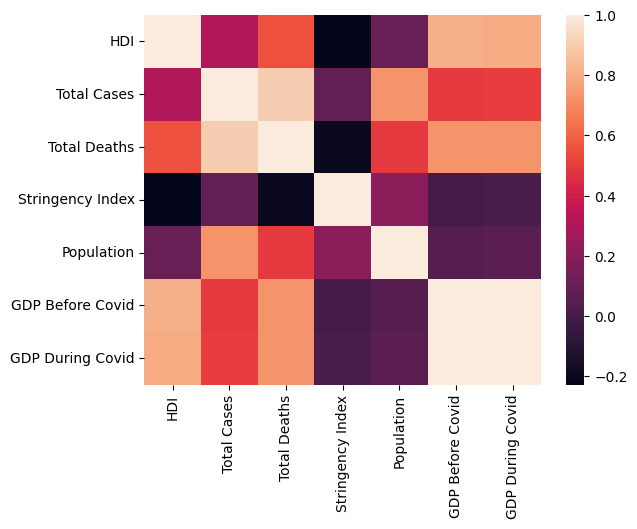

In [ ]:
sns.heatmap(data.drop(columns=['Country Code','Country']).corr())

In [ ]:
X = data[["Total Cases", "Total Deaths", "Stringency Index", "GDP Before Covid"]]
y = data["GDP During Covid"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mean Absolute Error (MAE): 765.3872630153146
Mean Squared Error (MSE): 1018191.8374510884
Root Mean Squared Error (RMSE): 1009.0549229110813
R-squared (R² Score): -0.9000538915056475


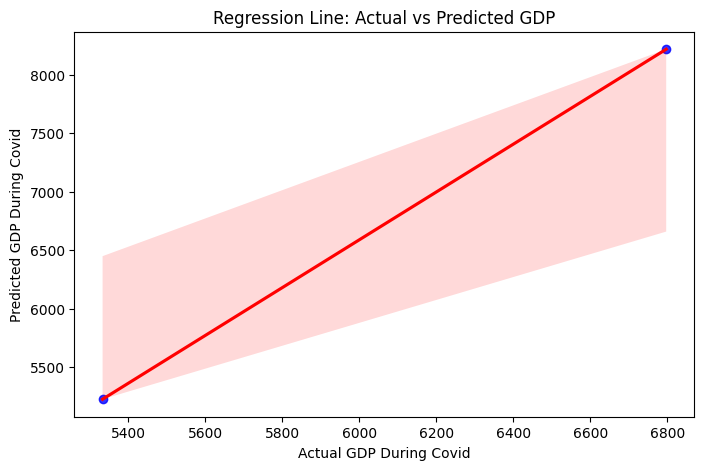

In [ ]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Performance Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R² Score): {r2}")

# Visualization: Actual vs Predicted GDP with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual GDP During Covid")
plt.ylabel("Predicted GDP During Covid")
plt.title("Regression Line: Actual vs Predicted GDP")
plt.show()

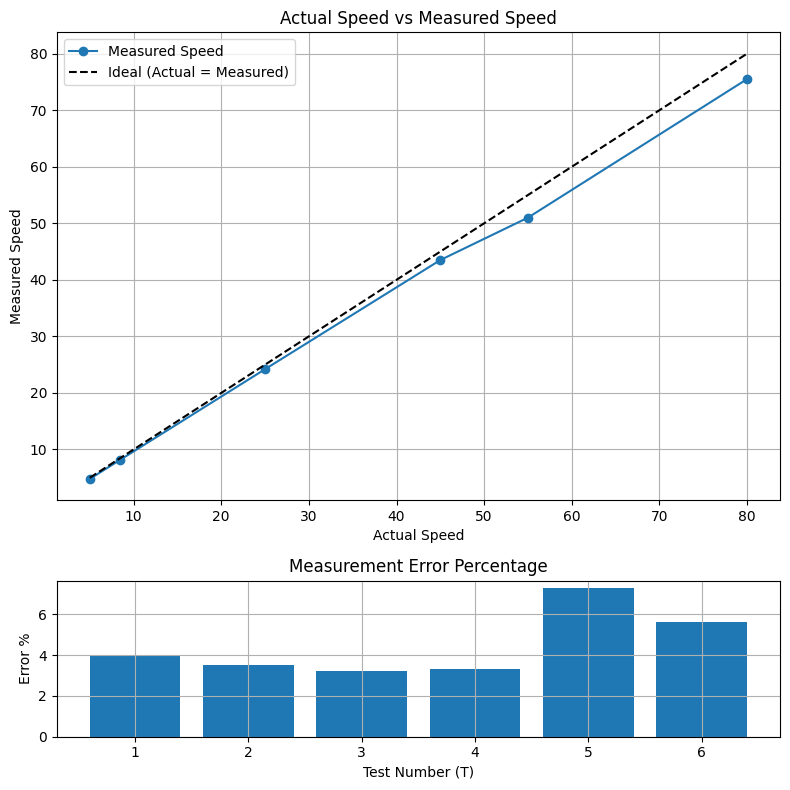

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
T = [1, 2, 3, 4, 5, 6]
zones = ['Under', 'Under', 'Normal', 'Normal', 'Over', 'Over']
actual = np.array([5.0, 8.5, 25.0, 45.0, 55.0, 80.0])
measured = np.array([4.8, 8.2, 24.2, 43.5, 51.0, 75.5])
error_percent = np.abs((actual - measured) / actual) * 100

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios':[3,1]})

# Plot Actual vs Measured speeds
ax1.plot(actual, measured, 'o-', label='Measured Speed')
ax1.plot(actual, actual, 'k--', label='Ideal (Actual = Measured)')
ax1.set_xlabel('Actual Speed')
ax1.set_ylabel('Measured Speed')
ax1.set_title('Actual Speed vs Measured Speed')
ax1.legend()
ax1.grid(True)

# Plot errors in percentage
ax2.bar(T, error_percent, tick_label=T)
ax2.set_xlabel('Test Number (T)')
ax2.set_ylabel('Error %')
ax2.set_title('Measurement Error Percentage')
ax2.grid(True)

plt.tight_layout()
plt.show()
